In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import RobustScaler,PowerTransformer
from tqdm import tqdm
import lightgbm as lgb
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit


In [13]:
df = pd.read_csv("data/data-kiem-tra-2.csv")
df.head()

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,10.05.2013,4,58,3773,299.0,1
1,26.05.2013,4,58,3768,249.0,1
2,19.05.2013,4,58,4036,419.0,1
3,25.05.2013,4,58,12878,149.0,1
4,15.05.2013,4,58,12885,148.0,1


In [14]:
df.isnull().sum()

date        0
truong_1    0
truong_2    0
truong_3    0
truong_4    0
truong_5    0
dtype: int64

In [15]:
msv = 2151260835
msv%3 + 1

1

In [16]:
df.isnull().sum()

date        0
truong_1    0
truong_2    0
truong_3    0
truong_4    0
truong_5    0
dtype: int64

In [17]:
df.dtypes

date         object
truong_1      int64
truong_2      int64
truong_3      int64
truong_4    float64
truong_5      int64
dtype: object

In [18]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df.dtypes

date        datetime64[ns]
truong_1             int64
truong_2             int64
truong_3             int64
truong_4           float64
truong_5             int64
dtype: object

In [19]:
df = df.groupby('date').sum().reset_index()

In [20]:
df.set_index('date', inplace=True)

In [21]:
df.shape

(214, 5)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7875 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND HOOK ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7897 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND DOT BELOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


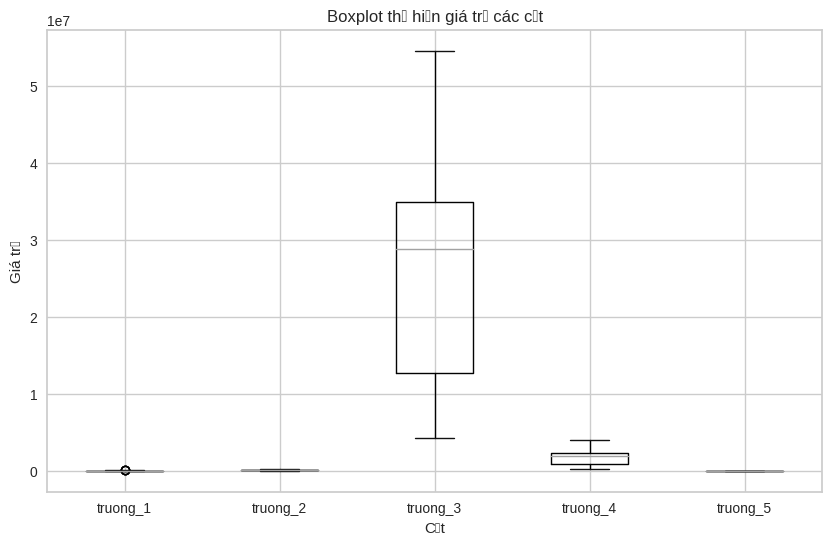

In [23]:
plt.figure(figsize=(10, 6))
df.boxplot()

# Thêm tiêu đề và nhãn trục
plt.title('Boxplot thể hiện giá trị các cột')
plt.ylabel('Giá trị')
plt.xlabel('Cột')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 7875 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND HOOK ABOVE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 7891 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND GRAVE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 7897 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND DOT BELOW}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.

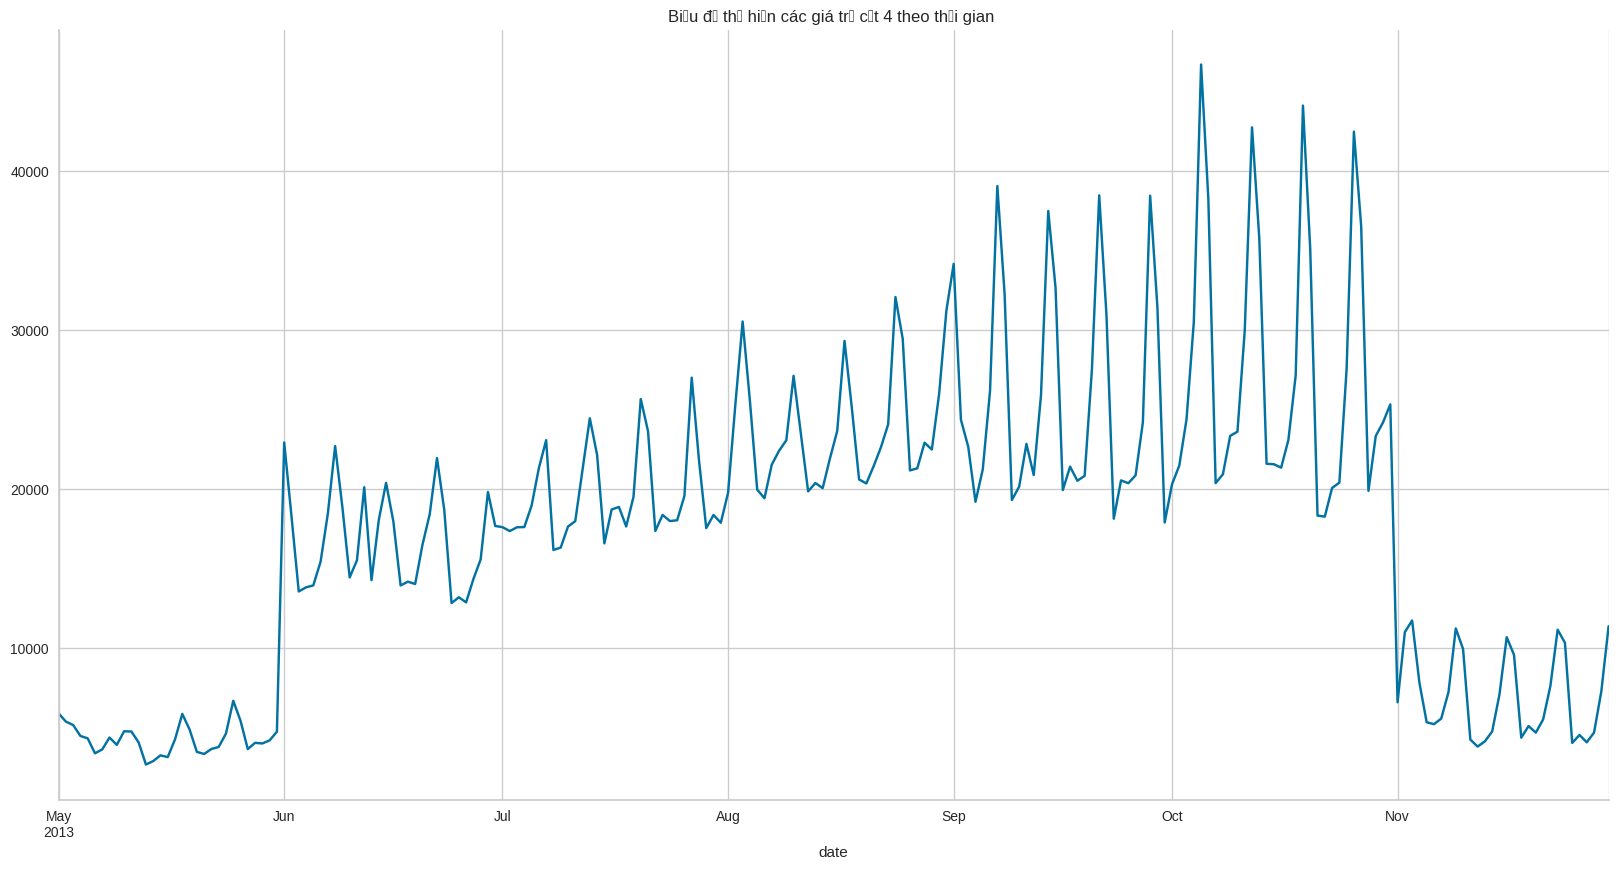

In [24]:
plt.figure(figsize=(20,10))
df['truong_1'].plot(kind='line',figsize=(20,10),title="Biểu đồ thể hiện các giá trị cột 4 theo thời gian ")
plt.gca().spines[['top','right']].set_visible(False)

# Hidden Markov

In [29]:
train_df = df[:-15]
test_df = df[-15:]
model_hmm = GaussianHMM(n_components=4, covariance_type="full", random_state=42)
model_hmm.fit(train_df['truong_1'].values.reshape(-1,1))

predicted_prices = []
current_price = train_df['truong_1'].values[-1]

for _ in range(len(test_df)):
    # Dự đoán trạng thái ẩn cho giá trị hiện tại
    current_state = model_hmm.predict([[current_price]])[0]
    # Lấy giá trị trung bình của trạng thái hiện tại để làm dự đoán cho bước tiếp theo
    predicted_price = np.random.normal(model_hmm.means_[current_state][0], np.sqrt(model_hmm.covars_[current_state][0][0]))
    predicted_prices.append(predicted_price)
    # Cập nhật giá trị hiện tại
    current_price = predicted_price
print(predicted_prices)

[3124.4447814083564, 8037.936874440556, 2889.9274000394594, 3809.7835621114173, 5511.0525192964205, 3903.5479512093734, 7599.9037738068655, 3525.5418628131056, 6677.862843287576, 6862.841552501682, 4818.708783459046, 4182.558404541332, 4309.191576138305, 5558.032575380423, 6261.0012873570995]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7875 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND HOOK ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7891 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND GRAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


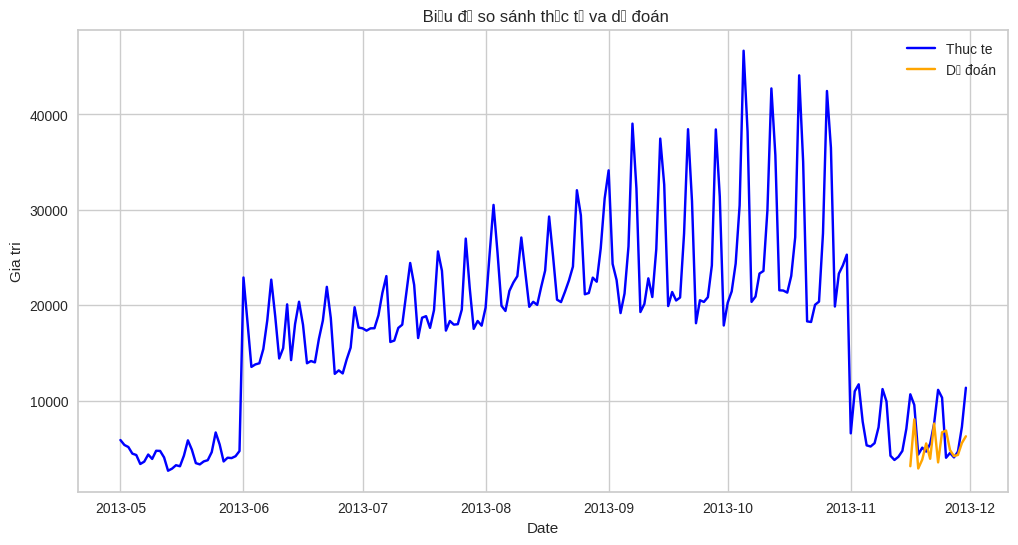

In [30]:
predicted_prices_df = pd.DataFrame(predicted_prices, index=test_df.index, columns=['predicted_sales'])

plt.figure(figsize=(12, 6))

plt.plot(df['truong_1'], label='Thuc te', color='blue')

plt.plot(predicted_prices_df['predicted_sales'], label='Dự đoán', color='orange')

plt.xlabel('Date')
plt.ylabel('Gia tri')
plt.title(' Biểu đồ so sánh thực tế va dự đoán')
plt.legend()
plt.show()

# LSTM

In [38]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_df = df[:-15]
test_df = df[-15:]

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)

# Tạo các chuỗi đầu vào và đầu ra cho mô hình LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Thêm chiều cho LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, batch_size=1, epochs=10)

# Dự đoán giá trị
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Chuyển đổi ngược lại giá trị dự đoán về phạm vi ban đầu

print(predictions)


Epoch 1/10
75/75 [==============================] - 5s 7ms/step - loss: 0.0570
Epoch 2/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0410
Epoch 3/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0384
Epoch 4/10
75/75 [==============================] - 0s 7ms/step - loss: 0.0393
Epoch 5/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0399
Epoch 6/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0338
Epoch 7/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0348
Epoch 8/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0349
Epoch 9/10
75/75 [==============================] - 1s 7ms/step - loss: 0.0344
Epoch 10/10
1/1 [==============================] - 1s 817ms/step
[[-0.13263771]
 [-0.15495622]
 [-0.16655332]
 [-0.16983235]
 [-0.17532797]]


In [39]:
predictions_df = pd.DataFrame(predictions, index=test_df.index, columns=['predictions'])

plt.figure(figsize=(12, 6))

plt.plot(df['truong_1'], label='Thuc te', color='blue')

plt.plot(predicted_prices_df['predictions'], label='Dự đoán', color='orange')

plt.xlabel('Date')
plt.ylabel('Gia tri')
plt.title(' Biểu đồ so sánh thực tế va dự đoán')
plt.legend()
plt.show()

ValueError: Shape of passed values is (5, 1), indices imply (15, 1)